 # Recommendation System
 

In [69]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [5]:
for dirname,_,filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/challenge_data.csv
./data/sample_submission.csv
./data/test.csv
./data/train.csv


In [24]:
train_data = pd.read_csv('./data/train.csv', header=0)
challenge_data = pd.read_csv('./data/challenge_data.csv', header=0)
test_data = pd.read_csv('./data/test.csv', header=0)
submission_data = pd.read_csv('./data/sample_submission.csv', header=0)

In [26]:
train_data.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933


In [25]:
submission_data.head()

,user_sequence,challenge
0,4577_11,CI23648
1,4577_12,CI23648
2,4577_13,CI23648
3,4578_11,CI23648
4,4578_12,CI23648


In [57]:
print(f" Train data size: {len(train_data)}, Challenge Data: {challenge_data.size}, Test data {len(test_data)} " )
print(" Percentage of Test data : {:.2f}".format((test_data.size/train_data.size)*100))

 Train data size: 903916, Challenge Data: 50454, Test data 397320 
 Percentage of Test data : 43.96


In [27]:
challenge_data.head()

,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,CI23478,2,SI2445,37.0,06-05-2006,AI563576,M,AOI100001,NaN
1,CI23479,2,SI2435,48.0,17-10-2002,AI563577,M,AOI100002,32.0
2,CI23480,1,SI2435,15.0,16-10-2002,AI563578,M,AOI100003,NaN
3,CI23481,1,SI2710,236.0,19-09-2003,AI563579,M,AOI100004,70.0
4,CI23482,2,SI2440,137.0,21-03-2002,AI563580,M,AOI100005,NaN


In [38]:
# Unique records in Challenge
print(len(np.unique(train_data['user_id'].values)))
print(len(np.unique(challenge_data['challenge_ID'].values)))

69532
5606


In [41]:
train_data = train_data.rename({'challenge':'challenge_ID'}, axis=1)

In [42]:
train_data.head()

,user_sequence,user_id,challenge_sequence,challenge_ID
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933


## Preprocessing

In [63]:
test_data = test_data.rename({'challenge':'challenge_ID'}, axis=1)

# Concatinate Train and Test dataset
combined_set = pd.concat([train_data, test_data], keys=[0,1])

In [64]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1301236 entries, (0, 0) to (1, 397319)
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   user_sequence       1301236 non-null  object
 1   user_id             1301236 non-null  int64 
 2   challenge_sequence  1301236 non-null  int64 
 3   challenge_ID        1301236 non-null  object
dtypes: int64(2), object(2)
memory usage: 52.8+ MB


In [66]:
# Merge the dataset with metadata
merged_data = pd.merge(left=combined_set, right=challenge_data, on='challenge_ID')

In [67]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301236 entries, 0 to 1301235
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   user_sequence         1301236 non-null  object 
 1   user_id               1301236 non-null  int64  
 2   challenge_sequence    1301236 non-null  int64  
 3   challenge_ID          1301236 non-null  object 
 4   programming_language  1301236 non-null  int64  
 5   challenge_series_ID   1301148 non-null  object 
 6   total_submissions     1296609 non-null  float64
 7   publish_date          1301236 non-null  object 
 8   author_ID             1296343 non-null  object 
 9   author_gender         1292614 non-null  object 
 10  author_org_ID         1233292 non-null  object 
 11  category_id           1245726 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 129.1+ MB


## Imputing Missing value

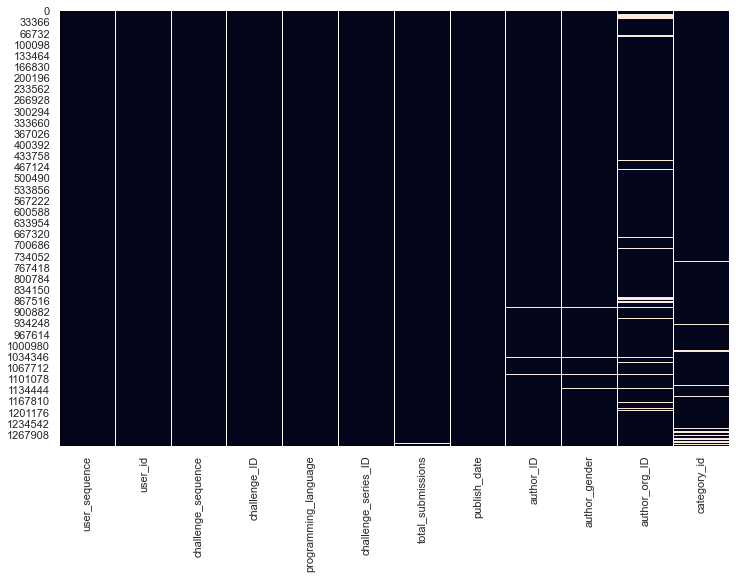

In [70]:
sns.set(style='whitegrid', palette='muted')
plt.figure(figsize=(12,8))
sns.heatmap(merged_data.isnull(), cbar=False)
plt.show()

In [84]:
null_data = merged_data.isnull().sum()
null_data

user_sequence               0
user_id                     0
challenge_sequence          0
challenge_ID                0
programming_language        0
challenge_series_ID        88
total_submissions        4627
publish_date                0
author_ID                4893
author_gender            8622
author_org_ID           67944
category_id             55510
dtype: int64

In [87]:
merged_data.loc[merged_data['challenge_series_ID'].isnull()]

,user_sequence,user_id,challenge_sequence,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
1258728,26204_12,26204,12,CI28148,1,NaN,9.0,18-09-2008,AI563734,M,AOI100114,NaN
1258729,28031_8,28031,8,CI28148,1,NaN,9.0,18-09-2008,AI563734,M,AOI100114,NaN
1258730,60978_9,60978,9,CI28148,1,NaN,9.0,18-09-2008,AI563734,M,AOI100114,NaN
1258731,63518_11,63518,11,CI28148,1,NaN,9.0,18-09-2008,AI563734,M,AOI100114,NaN
1258732,74435_12,74435,12,CI28148,1,NaN,9.0,18-09-2008,AI563734,M,AOI100114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1299805,102823_5,102823,5,CI29030,1,NaN,635.0,07-04-2010,AI566867,M,NaN,259.0
1300309,94357_9,94357,9,CI27492,1,NaN,95.0,01-12-2008,AI566131,M,AOI101339,39.0
1300310,99353_4,99353,4,CI27492,1,NaN,95.0,01-12-2008,AI566131,M,AOI101339,39.0
1300311,92739_10,92739,10,CI27492,1,NaN,95.0,01-12-2008,AI566131,M,AOI101339,39.0


In [97]:
series_data = merged_data.groupby('challenge_ID').filter(lambda x: x.challenge_ID == 'CI28148')

series_data

TypeError: filter function returned a Series, but expected a scalar bool

In [52]:
print("Size of the dataset {:,}".format(merged_data.size))

Size of the dataset 10,846,992


In [23]:
challenge_data.isnull().sum()

challenge_ID               0
programming_language       0
challenge_series_ID       12
total_submissions        352
publish_date               0
author_ID                 39
author_gender             97
author_org_ID            248
category_id             1841
dtype: int64